In [1]:
import os
import sys
ROOT_DIR = os.getcwd()[:os.getcwd().rfind('Quantum_DNA_1.0')]+ 'Quantum_DNA_1.0'
if ROOT_DIR not in sys.path:
    del sys.path[0]
    sys.path.insert(0, ROOT_DIR)

In [5]:
from DNA.model import Custom_TB_Model, save_tb_params, load_tb_params, tb_ham_1P

In [6]:
# 1. create a tight-binding model describing hierarchical relations between persons (tree-shaped)

tb_basis = ['P0', 'P1', 'P2', 'P3']
tb_config = [('relation', 'P0', 'P1'),
             ('relation', 'P0', 'P2'), 
             ('relation', 'P0', 'P3')]
num_strands = 1

tb_model = Custom_TB_Model('my_model', (1, 4), tb_basis, tb_config)

# 2. specify the persons and rate their relations with a number

tb_sites = ['Alice', 'Bob', 'Charlie', 'Eve']
tb_param_dict = {'relation_AliceBob': 5, 'relation_AliceCharlie': 3, 'relation_AliceEve': -2,
            'relation_BobAlice': 5, 'relation_CharlieAlice': 3, 'relation_EveAlice': -2}
info_dict={'author': 'Herb2024', 'subject': 'relations_between_persons'}

# 3. save and load the created dictionary to be able to reuse and look up the parameters later
save_tb_params(tb_param_dict, info_dict, directory = 'stored_data/my_params', notes = 'The parameters describe relations between persons.')
tb_param_dict = load_tb_params(info_dict, directory = 'stored_data/my_params', load_metadata = False)

# 4. create the corresponding matrix
tb_ham = tb_ham_1P(tb_model, tb_param_dict, dict(zip(tb_basis, tb_sites)) )
tb_ham

Data saved as stored_data/my_params\Herb2024_relations_between_persons.json
Data loaded from stored_data/my_params\Herb2024_relations_between_persons.json


array([[ 0.,  5.,  3., -2.],
       [ 5.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.],
       [-2.,  0.,  0.,  0.]])

In [52]:
import numpy as np
import matplotlib.pyplot as plt

from utils import save_fig
from DNA import calc_average_pop, calc_amplitudes, calc_frequencies, get_pop_fourier
from DNA.plotting import get_frame_fourier

Figure saved as stored_data//my_plots\test_fourier_version_0.pdf
Average population: 0.4999999999999998


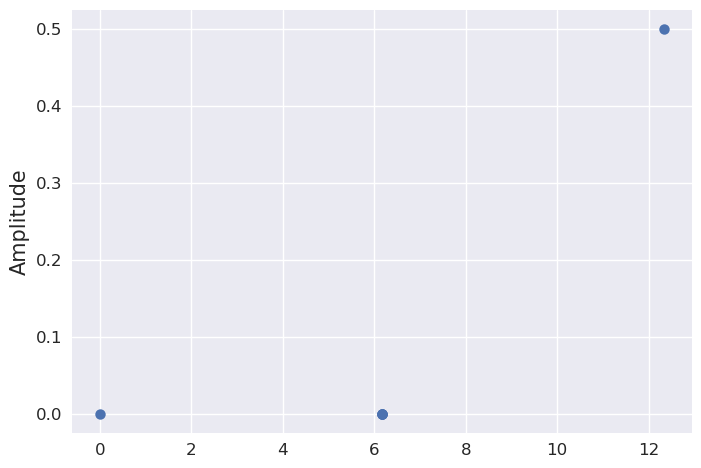

In [56]:
# As an example we plot the Fourier analysis of the Hamiltonian 
# As expected there is one dominating timescale 

eigv, eigs = np.linalg.eigh(tb_ham)
amplitudes = calc_amplitudes(eigs, 0, 0)
frequencies = calc_frequencies(eigv)
average_pop = calc_average_pop(eigs, 0, 0)
fig, ax = plt.subplots()
get_frame_fourier(ax, x_axis='frequencies')
ax.plot(frequencies, amplitudes, '.', markersize = 15)
save_fig(fig, 'test_fourier', 'stored_data//my_plots', format='pdf')
print(f'Average population: {average_pop}')
plt.show()

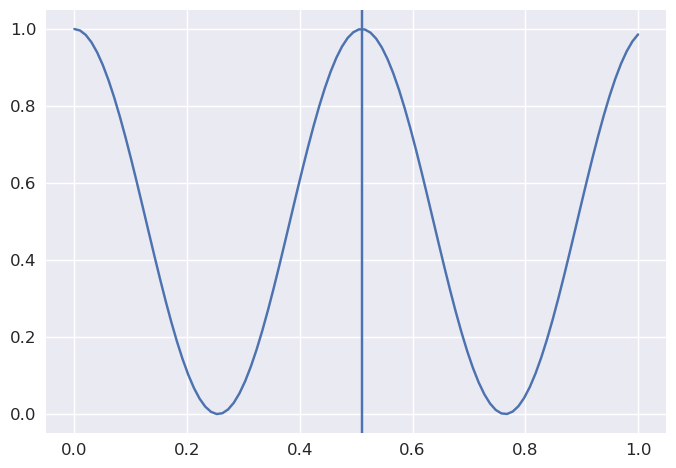

In [49]:
# plot of the population dynamics for Alice interacting with her colleagues
# the vertical line is calculated as 2*np.pi/frequency 

times = np.linspace(0,1,100)
pop_list = [get_pop_fourier(t, average_pop, amplitudes, frequencies) for t in times]
plt.plot(times, pop_list)
plt.axvline(x=0.5096)
plt.show()